# Examing social scientists' testimonies before the United States Congress from 1946 to 2016

### Saman Givian

#### 20 March 2023

## Introduction

### Overview
In this project, I analyze the frequency and causes of social scientists' appearance before the United States Congress from the years 1946 to 2016 along with other factors. The majority of the Congressional representatives come from a political background, but often legislation that they pass has many social and economic consequences especially taking to account that Congress has the power of the purse. Thus, it would make sense for Congress to rely more on experts for making laws. Especially to question people that hold positions in the federal reserve or treasury about the state of the economy and what their organization is doing. It would only make sense to expect the number of such testimonies to increase over time as we have become more science and data-driven society with more complex societal problems. But in this project, I show as we analyze the data that Congress doesn't rely more on the help of experts per se, but only in times of crisis. Additionally, it seems the majority of testimonies are being done by economists which are expected by taking to account the nature of Congress's responsibilities. As we analyze the reasons and committees that scientists most often testify we see the majority of Congressional concerns are toward's budget, taxes, health care, employment, social security, education, China, and small businesses,... which are mostly economic-related matters. It also seems a democratic-leaning Congress slightly increases the number of testimonies by social scientists. For this project I used a variety of charts such as bar charts, pie charts, scatter plots, and line plots along with Network and Text analysis and BeautifulSoup for web scrapping the data.

### Datasets 
&nbsp;&nbsp;&nbsp;&nbsp;This project explores uses three different datasets. The main dataset is the social scientists who testified before Congress from 1946-2016(with a slight update from 2016), the hearings they testified at, and the characteristics of those hearings, such as the congressional committees that convened them. This dataset was collected with the support NSF grant by Charles Seguin, Thomas V. Maher, and Yongjun Zhang and published on July 19, 2022.
<br/>&nbsp;&nbsp;&nbsp;&nbsp; I couldn't find a dataset that has a breakdown of each Congress by party and year.
But I found a table containing this information on the History, Art & Archives of the US House of Representatives.
So I scrapped the website with BeautifulSoup API, turned it into a data frame with Pandas, and saved it as CSV.
<br/>&nbsp;&nbsp;&nbsp;&nbsp; To find if there is a correlation between crises and scientists' testimonies, I decided to look at the recession data as it is the biggest economic challenge for Congress. Federal Reserve publishes all of its economic data, and the Federal Reserve Bank Of St. Louis had recession data from 1967 to now, which I used for this project.

### Links to datasets:
* [Social scientists congressional testimony](https://osf.io/e3h98/files/osfstorage).
* [Party Divisions of the House of Representatives, 1789 to Present](https://history.house.gov/Institution/Party-Divisions/Party-Divisions/).
* [Dates of U.S. recessions as inferred by GDP-based recession indicator](https://fred.stlouisfed.org/series/JHDUSRGDPBR)

### Motivation
Since the beginning of Covid-19, science and scientists have faced a lot of distrust and attacks from the public and even Congress. I was curious to see if Congress has historically relied on the experience and guidance of experts for help or not. Specifically, during times of crises like the financial crises of 2008 or the stagflation era of the 1980s, the 2001 terrorist attack, and the tech bubble of 2001. I also wanted to see whether our government relies more on the help of experts compared to the past as we have progressed and have more experts available to help us in making legislation. I also wanted to study the effect of political parties on how it affects the view on science and scientists testimonies.

### Questions
1. What type of social scientists does Congress mostly invite to testify?
2. Has the number of social scientists appearing before Congress increased over time?
3. Does Congress being dominated by Republicans or Democrats affect the number of social scientists testifying?
4. Are there any trends in the subfields of social scientists who testify?
5. What type of social scientists testify the most, and what are the probable causes?
6. For what causes does Congress mostly invite social scientists to testify?
7. Are there any patterns between crises and the number of scientists testifying before Congress?

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import requests

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from string import punctuation
from nltk.collocations import *
import nltk 
nltk.download('punkt')


import networkx as nx
from bokeh.plotting import figure
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, LabelSet
from bokeh.plotting import from_networkx
from bokeh.io import output_notebook, show, save

#To improve resolution
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import matplotlib.patches as mpatches

output_notebook()

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_1895/2079380586.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


Loading BokehJS ...

# Methods

### First Dataset - Social scientist's Congressional testimony
To get the first dataset,  I used the provided link by osf.io, downloaded it, and saved it as a CSV file.

### Second Dataset - Congress's historical data
This dataset was scrapped from [Party Divisions of the House of Representatives, 1789 to Present](https://history.house.gov/Institution/Party-Divisions/Party-Divisions/). I first grabbed the whole website with BeautifulSoup API and parsed it. Then I found the table headers and stored them and made a list of what final headers I need for my final data frame. In the next step, I went through the rows of the table, then I stored the rows that its Congress was after 1945. Then I dropped the renaming rows. I also, broke the "Congress (Years)" into two different columns the Congress years and the Congress number as they are two separate things. I converted the data type of Democrat and Republican columns from object to string as they are needed for comparison later on.


### Third Dataset - Federal Reserve's Recession data
For the third dataset, I used the data provided by the Federal Reserve bank of St Louis. I made a new column of years as the year is going to be a metric we are going to be comparing the results by, but the recession data is measured quarterly. So if there is a recession in part of the year, I just assumed that year has a recession in my research. I also renamed the 'JHDUSRGDPBR' column to 'IsRecession' as it was more of a appropriate label.

### Combined Dataset
I used left merge on the second dataset and the first dataset so that I could find out what scientists testified at what Congress. To do this task, I made two different data frames and matches the scientists with whether they appeared in the first or second year of Congress's term for its testimony and then combined the two data frames into one concat function. Thus I ended up with a dataset that has each scientist with the congress term they testified and the Congressional information of that Congress along with the original information of that testimony.


### Analytical process
In the explanatory section, I mostly tried to look at what each dataset tells me. I made a bar chart of what type of social scientist appeared the most, which made me curious why there is such a huge skew towards Economists and caused me to find another dataset for further research. I also checked, the political trend of Congress to see how has the political dynamic of the United States changed over time for a better perspective. Later on, I tried to see if there is any relationship between political parties and the number of testimonies with a pie chart. Then made a line chart of the total number of testimonies by year to see if I see a trend that I could dig deeper on. While overall we have an increase and then decrease in the number of testimonies before Congress, Congress's attitude toward different disciplines might be different which is why I decided to analyze by field in my analysis section. Then I did a text and network analysis to figure out what the issues Congress mostly holds hearings over as they will explain the heavy skew toward economists and figure out what are the issues Congress is mostly focused on.

In [3]:
#First Dataset - Social scientist's Congressional testimony
df_testimony = pd.read_csv('https://osf.io/download/asdp8/')
df_testimony.to_csv('SocialScientistsTestiomonyDataset.csv')
df_testimony.head()

,Unnamed: 0,hearing_id,year,date_begin,date_end,witness_name,witness_affiliation,discipline1,discipline2,discipline3,...,thinktank1,thinktank2,full_committee1,sub_committee1,full_committee2,sub_committee2,title_description,filter,HID,univ_aff
0,1,HRG-1946-SAP-0010,1946,"May 8, 1946","Jun. 3, 1946",howard grieves,"chief economist, census bur",Economist,NaN,NaN,...,NaN,NaN,committee on appropriations. senate,NaN,NaN,NaN,"departments of state, justice, commerce, and t...",1,20171,0
1,2,HRG-1947-SAP-0013,1947,"May 26, 1947","Jun. 16, 1947",philip hauser,"dep dir, bur of census",Sociologist,NaN,NaN,...,NaN,NaN,committee on appropriations. senate,NaN,NaN,NaN,"departments of state, justice, commerce, and t...",1,20655,0
2,3,HRG-1947-MMF-0018,1947,"Jun. 27, 1947","Jul. 16, 1947",j. ely,"chief, foreign trade div, bur of census, comme...",Economist,NaN,NaN,...,NaN,NaN,committee on merchant marine and fisheries. house,NaN,NaN,NaN,use of american-owned tankers transporting gas...,1,21081,0
3,4,HRG-1948-EXD-0008,1948,"Mar. 24, 1948","Apr. 15, 1948",j. ely,"chief, foreign trade div, census bur, commerce...",Economist,NaN,NaN,...,NaN,NaN,committee on expenditures in executive departm...,subcommittee on surplus property,NaN,NaN,"investigation, disposition of surplus property...",1,21584,0
4,5,HRG-1949-SAP-0018,1949,"Aug. 31, 1949","Sep. 15, 1949",philip hauser,"act dir, bur of census",Sociologist,NaN,NaN,...,NaN,NaN,committee on appropriations. senate,NaN,NaN,NaN,supplemental appropriation bill for 1950,1,22017,0


In [4]:
df_testimony.tail()

,Unnamed: 0,hearing_id,year,date_begin,date_end,witness_name,witness_affiliation,discipline1,discipline2,discipline3,...,thinktank1,thinktank2,full_committee1,sub_committee1,full_committee2,sub_committee2,title_description,filter,HID,univ_aff
15477,15478,H37-20160907-01,2016,"Sep. 7, 2016","Sep. 7, 2016",jeffrey lacker,"federal reserve bank, richmond",Economist,NaN,NaN,...,NaN,NaN,committee on financial services. house,subcommittee on monetary policy and trade,NaN,NaN,"federal reserve districts: governance, monetar...",1,118160,0
15478,15479,H37-20160907-01,2016,"Sep. 7, 2016","Sep. 7, 2016",william spriggs,"afl-cio and professor, economics , howard univ...",Economist,NaN,NaN,...,NaN,NaN,committee on financial services. house,subcommittee on monetary policy and trade,NaN,NaN,"federal reserve districts: governance, monetar...",1,118160,1
15479,15480,S43-20160922-01,2016,"Sep. 22, 2016","Sep. 22, 2016",susan collins,r -me,Economist,NaN,NaN,...,NaN,NaN,"committee on health, education, labor, and pen...",NaN,NaN,NaN,cosmetic development and safety,1,118162,0
15480,15481,S18-20160301-03,2016,"Mar. 1, 2016","Mar. 1, 2016",robert johansson,usda,Economist,NaN,NaN,...,NaN,NaN,committee on appropriations. senate,"subcommittee on agriculture, rural development...",NaN,NaN,farm economy,1,118214,0
15481,15482,S18-20160301-03,2016,"Mar. 1, 2016","Mar. 1, 2016",nathan kauffman,"omaha branch executive , federal reserve bank ...",Economist,NaN,NaN,...,NaN,NaN,committee on appropriations. senate,"subcommittee on agriculture, rural development...",NaN,NaN,farm economy,1,118214,0


In [5]:
#Second Dataset - Congress's historical data
#Scrapping from the website 
response = requests.get('https://history.house.gov/Institution/Party-Divisions/Party-Divisions/')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [6]:
#Getting the Table Headers from the website
columns_headers = []

table = document.find('table')
table_header = table.find("thead")

for header in table_header.find_all("th"):
    columns_headers.append(header.text.strip())

print(columns_headers)

['Congress (Years)', '# of House Seats', 'Pro-Administration', 'Anti-Administration', 'Other', 'Del./Res.']


In [7]:
#Fixing the headers for the dataframe 
#Since I limited my dataframe to years that Democrats and Republicans were the dominated parties, I changed the headers for them
columns_headers[2] = "Democrats"
columns_headers[3] = "Republicans"
columns_headers.append("Year")
columns_headers.append("Congress")

In [8]:
#Reading through the tables body on the website and only grabbing data for years after 1945
congress_breakdown_rows  = []

#Table body
table_body = table.find("tbody")

add_row_permission = False
congress_counter = 0

for row in table_body.find_all("tr"):
  
  table_row = []
  first_cell = True
  congress = ""
  year = ""
  
  for cell in row.find_all("td"):
    if(first_cell):
      first_cell_list = cell.text.strip().split(" ")
      congress = first_cell_list[0]
      year = first_cell_list[1]
      if("1945" in year):
        add_row_permission = True
        
      first_cell = False
      
    if(add_row_permission):
     
      table_row.append(cell.text.strip())
  
  if(add_row_permission):
    table_row.append(year)
    table_row.append(congress)

    congress_breakdown_rows.append(table_row)

df_congress_breakdown = pd.DataFrame(congress_breakdown_rows, columns=columns_headers)

In [9]:
df_congress_breakdown.head()

,Congress (Years),# of House Seats,Democrats,Republicans,Other,Del./Res.,Year,Congress
0,78th (1943–1945),435,222,209,"Progressives (2),Farmer-Labor (1),American Lab...",2/2,(1943–1945),78th
1,79th (1945–1947),435,244,189,"Progressives (1),American Labor (1)",2/2,(1945–1947),79th
2,80th (1947–1949),435,188,246,American Labor (1),2/1,(1947–1949),80th
3,81st (1949–1951),435,263,171,American Labor (1),2/1,(1949–1951),81st
4,82nd (1951–1953),435,235,199,Independent (1),2/1,(1951–1953),82nd


In [10]:
df_congress_breakdown.tail()

,Congress (Years),# of House Seats,Democrats,Republicans,Other,Del./Res.,Year,Congress
39,114th (2015–2017),435,188,247,0,5/1,(2015–2017),114th
40,115th (2017–2019),435,194,241,0,5/1,(2017–2019),115th
41,116th (2019-2021),4354,235,199,0,5/1,(2019-2021),116th
42,117th (2021–2023),4355,222,212,0,5/1,(2021–2023),117th
43,118th (2023–2025),435,213,222,0,5/1,(2023–2025),118th


In [11]:
df_congress_breakdown.drop(df_congress_breakdown.tail(4).index,
        inplace = True)

In [12]:
df_congress_breakdown.columns

Index(['Congress (Years)', '# of House Seats', 'Democrats', 'Republicans',
       'Other', 'Del./Res.', 'Year', 'Congress'],
      dtype='object')

In [13]:
df_congress_breakdown.dropna(how='any', inplace=True)

In [14]:
display(df_congress_breakdown)

,Congress (Years),# of House Seats,Democrats,Republicans,Other,Del./Res.,Year,Congress
0,78th (1943–1945),435,222,209,"Progressives (2),Farmer-Labor (1),American Lab...",2/2,(1943–1945),78th
1,79th (1945–1947),435,244,189,"Progressives (1),American Labor (1)",2/2,(1945–1947),79th
2,80th (1947–1949),435,188,246,American Labor (1),2/1,(1947–1949),80th
3,81st (1949–1951),435,263,171,American Labor (1),2/1,(1949–1951),81st
4,82nd (1951–1953),435,235,199,Independent (1),2/1,(1951–1953),82nd
5,83rd (1953–1955),435,213,221,Independent (1),2/1,(1953–1955),83rd
6,84th (1955–1957),435,232,203,0,2/1,(1955–1957),84th
8,85th (1957–1959),435,232,203,0,2/1,(1957–1959),85th
9,86th (1959–1961),4363,282,153,Independent Democrat (1),1/1,(1959–1961),86th
10,87th (1961–1963),437,264,173,0,0/1,(1961–1963),87th


In [15]:
df_congress_breakdown.to_csv('CongressDataset.csv')

In [16]:
print(df_congress_breakdown.dtypes)

Congress (Years)    object
# of House Seats    object
Democrats           object
Republicans         object
Other               object
Del./Res.           object
Year                object
Congress            object
dtype: object


In [17]:
df_congress_breakdown['Democrats'] = df_congress_breakdown['Democrats'].astype(int)
df_congress_breakdown['Republicans'] = df_congress_breakdown['Republicans'].astype(int)

In [18]:
#Third Dataset - Recession Data from 1967 - Now
df_recession = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=JHDUSRGDPBR&scale=left&cosd=1967-10-01&coed=2022-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-03-18&revision_date=2023-03-18&nd=1967-10-01')
df_recession.to_csv('USRecessionData.csv')
df_recession["Year"] = df_recession["DATE"].str[:4]
df_recession = df_recession.rename(columns={'JHDUSRGDPBR': 'IsRecession'})

display(df_recession)

,DATE,IsRecession,Year
0,1967-10-01,0.0,1967
1,1968-01-01,0.0,1968
2,1968-04-01,0.0,1968
3,1968-07-01,0.0,1968
4,1968-10-01,0.0,1968
...,...,...,...
215,2021-07-01,0.0,2021
216,2021-10-01,0.0,2021
217,2022-01-01,0.0,2022
218,2022-04-01,0.0,2022


In [19]:
# Merging the the two datasets 
year1 = []
year2 = [] 
for ind in df_congress_breakdown.index:
    
    if("2021" in df_congress_breakdown['Year'][ind] and "2019" in df_congress_breakdown['Year'][ind]):
        years = df_congress_breakdown['Year'][ind].split("-")
    else:
        years = df_congress_breakdown['Year'][ind].split("–")
    year1.append(int(years[0][1:5]))
    year2.append(int(years[1][0:4])-1)
    
    

df_congress_breakdown['Year_1'] = year1
df_congress_breakdown['Year_2'] = year2

df_testimony['Year_1'] = df_testimony["year"]
df_testimony['Year_2'] = df_testimony["year"]

new_df_1 = pd.merge(df_testimony,df_congress_breakdown ,  how='left', left_on=['Year_1'], right_on = ['Year_1'])
new_df_2 = pd.merge( df_testimony,df_congress_breakdown ,  how='left', left_on=['Year_2'], right_on = ['Year_2'])

frames = [new_df_1, new_df_2]

df_merged = pd.concat(frames)
display(df_merged)
df_merged.to_csv('MergedDataset.csv')

,Unnamed: 0,hearing_id,year,date_begin,date_end,witness_name,witness_affiliation,discipline1,discipline2,discipline3,...,Democrats,Republicans,Other,Del./Res.,Year,Congress,Year_2_y,Year_1_x,Year_2,Year_1_y
0,1,HRG-1946-SAP-0010,1946,"May 8, 1946","Jun. 3, 1946",howard grieves,"chief economist, census bur",Economist,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,HRG-1947-SAP-0013,1947,"May 26, 1947","Jun. 16, 1947",philip hauser,"dep dir, bur of census",Sociologist,NaN,NaN,...,188.0,246.0,American Labor (1),2/1,(1947–1949),80th,1948.0,NaN,NaN,NaN
2,3,HRG-1947-MMF-0018,1947,"Jun. 27, 1947","Jul. 16, 1947",j. ely,"chief, foreign trade div, bur of census, comme...",Economist,NaN,NaN,...,188.0,246.0,American Labor (1),2/1,(1947–1949),80th,1948.0,NaN,NaN,NaN
3,4,HRG-1948-EXD-0008,1948,"Mar. 24, 1948","Apr. 15, 1948",j. ely,"chief, foreign trade div, census bur, commerce...",Economist,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,HRG-1949-SAP-0018,1949,"Aug. 31, 1949","Sep. 15, 1949",philip hauser,"act dir, bur of census",Sociologist,NaN,NaN,...,263.0,171.0,American Labor (1),2/1,(1949–1951),81st,1950.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15477,15478,H37-20160907-01,2016,"Sep. 7, 2016","Sep. 7, 2016",jeffrey lacker,"federal reserve bank, richmond",Economist,NaN,NaN,...,188.0,247.0,0,5/1,(2015–2017),114th,NaN,2016.0,2016.0,2015.0
15478,15479,H37-20160907-01,2016,"Sep. 7, 2016","Sep. 7, 2016",william spriggs,"afl-cio and professor, economics , howard univ...",Economist,NaN,NaN,...,188.0,247.0,0,5/1,(2015–2017),114th,NaN,2016.0,2016.0,2015.0
15479,15480,S43-20160922-01,2016,"Sep. 22, 2016","Sep. 22, 2016",susan collins,r -me,Economist,NaN,NaN,...,188.0,247.0,0,5/1,(2015–2017),114th,NaN,2016.0,2016.0,2015.0
15480,15481,S18-20160301-03,2016,"Mar. 1, 2016","Mar. 1, 2016",robert johansson,usda,Economist,NaN,NaN,...,188.0,247.0,0,5/1,(2015–2017),114th,NaN,2016.0,2016.0,2015.0


# Explatory Section 

['Anthropologist', 'Economist', 'Political Scientist', 'Psychologist', 'Sociologist']
[305, 10821, 2482, 970, 904]


<AxesSubplot: title={'center': 'Social scientists count by field'}>

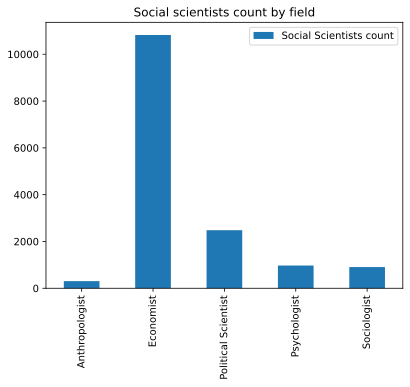

In [20]:
#Visualization 1 - Social Scientists breakdown by field 
df_testimony_discipline1 = df_testimony.groupby('discipline1')['discipline1'].count()
scientists_type = list(df_testimony_discipline1.keys())
scientists_value = list(df_testimony_discipline1)
print(scientists_type)
print(scientists_value)
plotdata = pd.DataFrame(
    {"Social Scientists count": scientists_value}, 
    index=scientists_type)


plotdata.plot(kind="bar",title = "Social scientists count by field")

#### Analysis
The most common social scientists that appeared before congress are economists, followed by political scientists, psychologists, sociologists, and anthropologists. The economists dominat the testimonies by a large margin.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


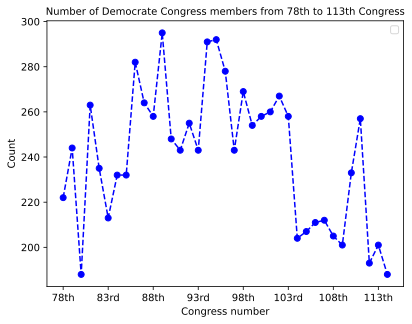

In [21]:
#Visualization 2 - Number of Democrate Congress members from 78th to 113th Congress
df_congress_breakdown.plot(x = "Congress",y='Democrats', linestyle='--', marker='o', color='b', label='')
plt.title(label="Number of Democrate Congress members from 78th to 113th Congress",
          fontsize=10)
plt.xlabel('Congress number') 
plt.ylabel('Count') 
plt.legend()

#### Analysis
We have an uptick in the number of Democrate members in the 80-100th Congress, followed by a sharp decline and a slight uptick, and decline again.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


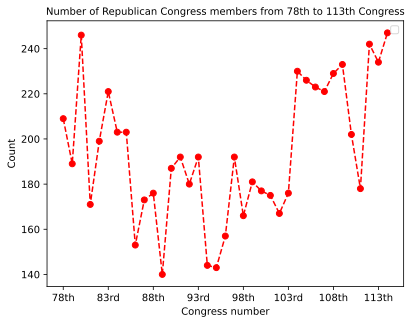

In [22]:
#Visualization 3 - Number of Republican Congress members from 78th to 113th Congress
df_congress_breakdown.plot(x = "Congress",y='Republicans', linestyle='--', marker='o', color='r', label='')
plt.title(label="Number of Republican Congress members from 78th to 113th Congress",
          fontsize=10)
plt.xlabel('Congress number') 
plt.ylabel('Count')
plt.legend()

#### Analysis
We have an decline in the number of Republican members in the 80-100th Congress, followed an increase.

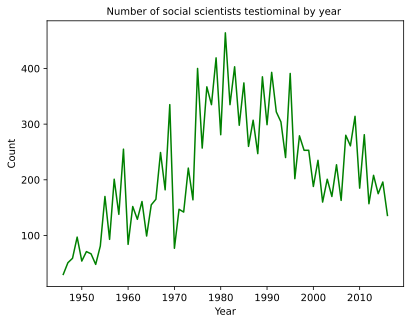

In [23]:
#Visualization 4 - Scientists by year
df_testimony_appearence_count_year = df_testimony.groupby('year')['year'].count()

#print(df_testimony_appearence_count_year)
x = list(df_testimony_appearence_count_year.keys())
y = list(df_testimony_appearence_count_year)

plt.title(label="Number of social scientists testiominal by year ",
          fontsize=10)
plt.xlabel('Year') 
plt.ylabel('Count')
plt.plot(x,y,'g')

### Analysis
As we can we have an overall increase in the number of testimonies from the 1950s to the 1980s, but then we have a continuous downward trend from then on.

In [24]:
appearence_by_scientists = df_testimony.groupby('witness_name')['witness_name'].count().sort_values(ascending=False)
print(appearence_by_scientists)
appearence_by_scientists.describe()

witness_name
alan greenspan         189
alice rivlin           145
daniel moynihan        142
douglas holtz-eakin    106
robert reischauer       97
                      ... 
leo pasvolsky            1
donald redfoot           1
donald pierce            1
donald parsons           1
joseph mulholland        1
Name: witness_name, Length: 5457, dtype: int64


count    5457.000000
mean        2.837090
std         6.624598
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       189.000000
Name: witness_name, dtype: float64

### Analysis
There seem to be several famous scientists who testified alot such as Alan Greenspan and Alice Rivlin, but if have look at the statistics most scientists have only testified at most once.

(array([4.795e+03, 3.560e+02, 1.290e+02, 5.000e+01, 2.900e+01, 2.600e+01,
        1.700e+01, 9.000e+00, 1.100e+01, 9.000e+00, 2.000e+00, 5.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   4.76,   8.52,  12.28,  16.04,  19.8 ,  23.56,  27.32,
         31.08,  34.84,  38.6 ,  42.36,  46.12,  49.88,  53.64,  57.4 ,
         61.16,  64.92,  68.68,  72.44,  76.2 ,  79.96,  83.72,  87.48,
         91.24,  95.  ,  98.76, 102.52, 106.28, 110.04, 113.8 , 117.56,
        121.32, 125.08, 128.84, 132.6 , 136.36, 140.12, 143.88, 147.64,
        151.4 , 

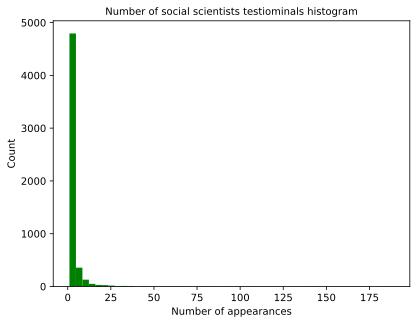

In [25]:
#Visualization 5 - Scientists by year
plt.title(label="Number of social scientists testiominals histogram",
          fontsize=10)
plt.xlabel('Number of appearances') 
plt.ylabel('Count')
plt.hist(appearence_by_scientists,bins=50, color='green')

### Analysis
As the histogram show there are barely any scientists who testied more than 25 times and the majority(over 4000 scientists)only testied once or twice.

Mean: 436.11267605633805
Median: 404.0
Standard deviation: 211.1096904655272
Max: 928
Min: 60


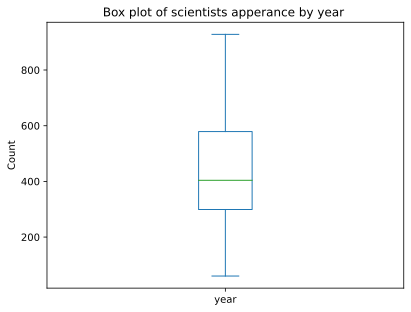

In [26]:
#Visualization 6 - Box plot for scientists apperance by year
scientists_by_year = df_merged.groupby('year')['year'].count()
plt.title("Box plot of scientists apperance by year ")
plt.ylabel('Count')
scientists_by_year.plot(kind='box')
print("Mean: "+ str(scientists_by_year.mean()))
print("Median: "+ str(scientists_by_year.median()))
print("Standard deviation: "+ str(scientists_by_year.std()))
print("Max: "+ str(scientists_by_year.max()))
print("Min: "+ str(scientists_by_year.min()))

### Analysis
As we can on average there are 200 scientists testimonies per year at Congress or about one per working per day. The  standard deviation is 211 which is kind of huge and shows the amount of variability in the number of testimonies.
There is also a significant difference between the max(928) and the min(60) number of testimonies.

#  Analysis Section 

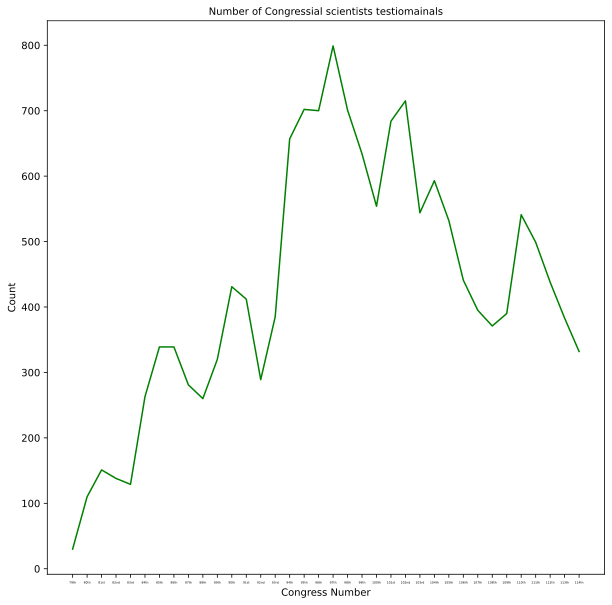

In [27]:
#Visualization 1 - Number of scientists appearenace by Congress - year
scientists_by_congress = df_merged.groupby('Congress')['Congress'].count()

x_unsorted = list(scientists_by_congress.keys())
y_unsorted = list(scientists_by_congress)

x = x_unsorted[15:]+x_unsorted[0:15]
y = y_unsorted[15:]+y_unsorted[0:15]
plt.figure(figsize=(10,10))
plt.title("Number of Congressial scientists testiomainals",fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.xlabel('Congress Number',fontsize = 10)

plt.xticks(fontsize = 3)
plt.plot(x,y,'g')

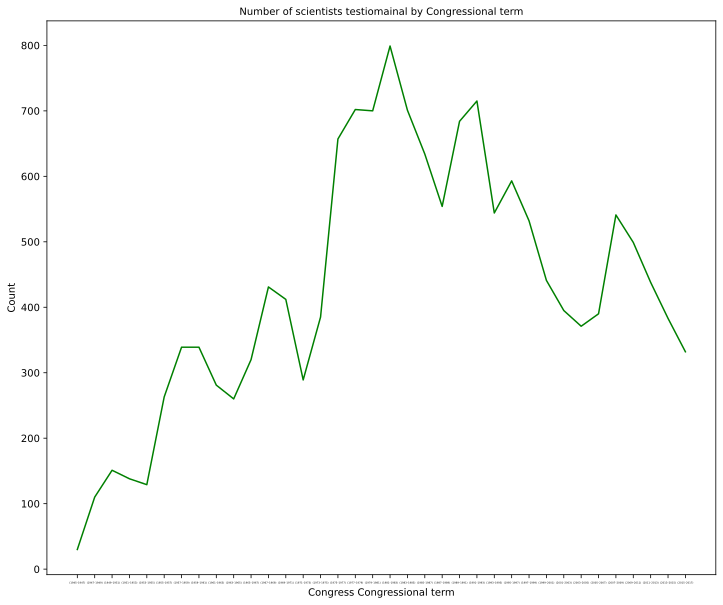

In [28]:
scientists_by_congress = df_merged.groupby('Year')['Year'].count()

x = list(scientists_by_congress.keys())
y = list(scientists_by_congress)

plt.figure(figsize=(12,10))
plt.title("Number of scientists testiomainal by Congressional term",fontsize=10)
plt.ylabel('Count',fontsize = 10)
plt.xlabel('Congress Congressional term',fontsize = 10)
plt.xticks(fontsize = 2.5)
plt.plot(x,y,'g')

### Analysis 
As we can see from the line chart, the number of testimonies peeked at the 97th Congress(1981-1983), and the lowest number of testimonies happened at the 79th Congress(1945-1947), but this might be because our dataset started counting the number of testimonies from 1946. There is an increase in testimonis during financial crises of 2008, but then it starts to decline again.

Number of Congresses with Democrate majority: 26
Number of Congresses with Republican majority: 11


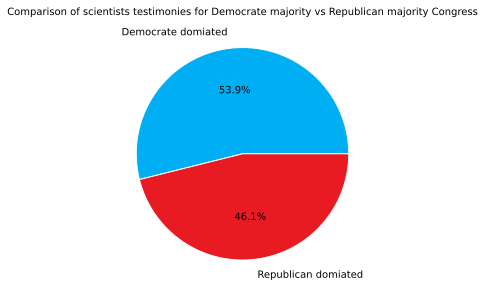

In [29]:
#Visualization 2 - Number of scientists appearenace by democrate vs republican dominated congress
df_democrateDominatedCongress = df_merged[df_merged["Democrats"]>df_merged["Republicans"]]
df_republicanDominatedCongress = df_merged[df_merged["Republicans"]>df_merged["Democrats"]]

df_democrateDominatedCongress_count = df_congress_breakdown[df_congress_breakdown["Democrats"]>df_congress_breakdown["Republicans"]]
df_republicanDominatedCongress_count = df_congress_breakdown[df_congress_breakdown["Republicans"]>df_congress_breakdown["Democrats"]]
print("Number of Congresses with Democrat majority: " + str(len(df_democrateDominatedCongress_count)))
print("Number of Congresses with Republican majority: "+str(len(df_republicanDominatedCongress_count)))

#Normalization
y = np.array([len(df_democrateDominatedCongress)/len(df_democrateDominatedCongress_count), 
              len(df_republicanDominatedCongress)/len(df_republicanDominatedCongress_count)])
mylabels = ["Democrate domiated", "Republican domiated"]
colors = ['#00AEF3', '#E81B23']

plt.title("Comparison of scientists testimonies for Democrat majority vs Republican majority Congress",fontsize = 10)
plt.pie(y, labels = mylabels, autopct='%1.1f%%',labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors = colors)

plt.show()

###  Analysis
As we can see from the pie chart there does seem to be a small correlation between the number of scientists appearing and wether Congress is Republican or Democrat-dominated. We have had 26 Congress with Democrats since 1946 and 11 Congresses with a Republican majority. After normalization, 53.9% of testimonies happened a Democrate majority Congress and 46.1% with a Republican majority. But this difference isn't significant enough to state anything conclusively as there may be other factors involved.

In [30]:
scientist_type = df_merged['discipline1'].unique()
print("Social scientists disciplines :"+ str(scientist_type))

Social scientists disciplines :['Economist' 'Sociologist' 'Political Scientist' 'Psychologist'
 'Anthropologist']


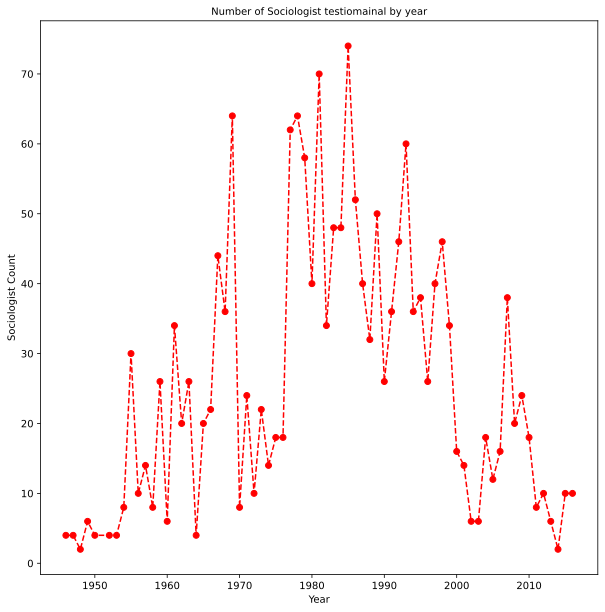

In [31]:
#Visualization 3 - Different types of scoial  scientist  appearenace by year

df_sociologist = df_merged[df_merged["discipline1"] == "Sociologist"]
sociologist_by_year = df_sociologist.groupby('year')['year'].count()
x = list(sociologist_by_year.keys())
y = list(sociologist_by_year)

plt.figure(figsize=(10,10))
plt.plot(x,y, linestyle='--', marker='o', color='r' )
plt.title("Number of Sociologist testiomainal by year",fontsize=10)
plt.ylabel('Sociologist Count',fontsize = 10)
plt.xlabel('Year',fontsize = 10)
plt.show()

### Analysis 
We have an uptick in number of sociologists in the 1980s and 1990s, but then we have a continous downward trend.
As we the maximum number of sociologists ever appearning before Congress is around 1970's.

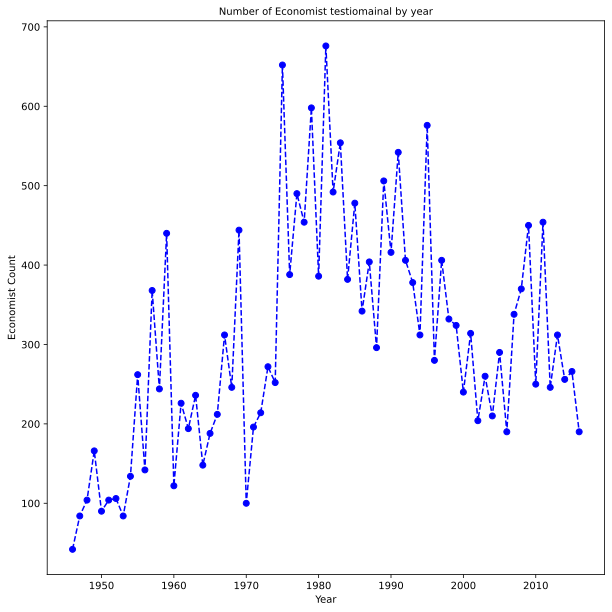

In [32]:
df_economicist = df_merged[df_merged["discipline1"] == "Economist"]
economicist_by_year = df_economicist.groupby('year')['year'].count()
x = list(economicist_by_year.keys())
y = list(economicist_by_year)

plt.figure(figsize=(10,10))
plt.plot(x,y, linestyle='--', marker='o', color='b', label='')
plt.title("Number of Economist testiomainal by year",fontsize=10)
plt.ylabel('Economist Count',fontsize = 10)
plt.xlabel('Year',fontsize = 10)
plt.show()

### Analysis 
We have an uptick in the number of economists in the late 1950s and 1960s and most of the 1980s, but then we have a continuous downward trend. But, there is another uptick around the financial crises of 2008 which shows Congress invites significantly more economists when there is a recession.

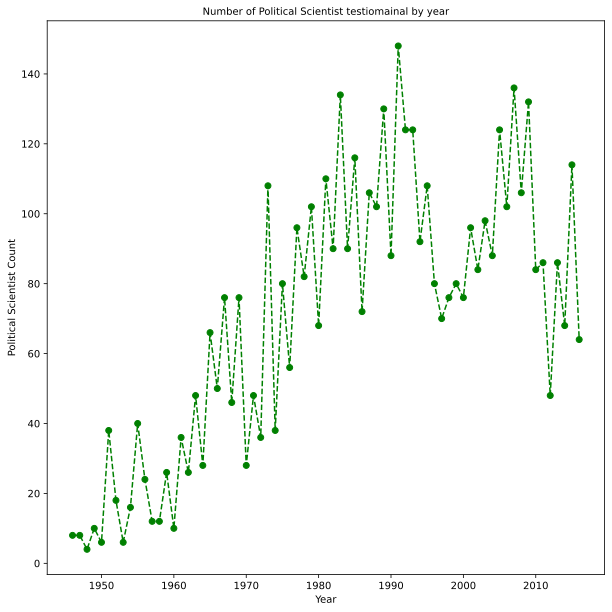

In [33]:
df_political = df_merged[df_merged["discipline1"] == "Political Scientist"]
political_by_year = df_political.groupby('year')['year'].count()
x = list(political_by_year.keys())
y = list(political_by_year)

plt.figure(figsize=(10,10))
plt.plot(x,y, linestyle='--', marker='o', color='g', label='')
plt.title("Number of Political Scientist testiomainal by year",fontsize=10)
plt.ylabel('Political Scientist Count',fontsize = 10)
plt.xlabel('Year',fontsize = 10)
plt.show()

### Analysis 
Contrary to other types of social scientists, there is a continuous increase in the number of political scientists appearing before Congress, this might be because our society has gotten more polarized and more political overtime. The number of political scientists appearing from the 1950s, and 1960s have doubled and tripled in recent years.

Text(0.5, 0, 'Year')

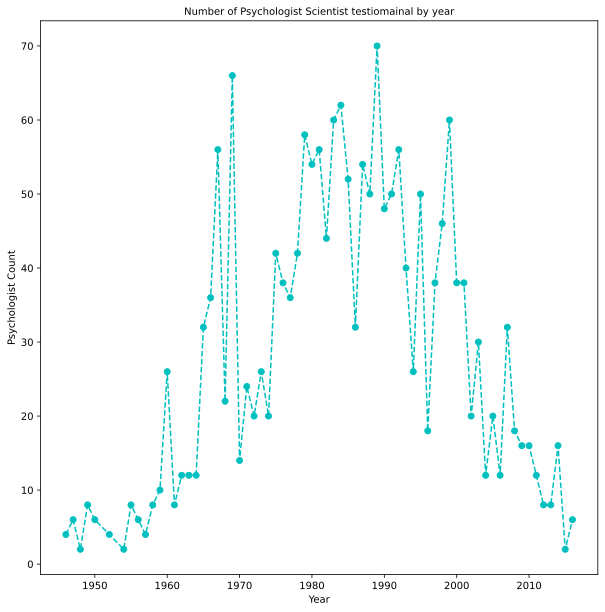

In [34]:
df_psychologist = df_merged[df_merged["discipline1"] == "Psychologist"]

psychologist_by_year = df_psychologist.groupby('year')['year'].count()
x = list(psychologist_by_year.keys())
y = list(psychologist_by_year)

plt.figure(figsize=(10,10))
plt.plot(x,y, linestyle='--', marker='o', color='c', label='')
plt.title("Number of Psychologist Scientist testiomainal by year",fontsize=10)
plt.ylabel('Psychologist Count',fontsize = 10)
plt.xlabel('Year',fontsize = 10)

### Analysis 
we have an overall decrease in the number of psychologist appearances which was unexpected, because of the growing importance of mental health.

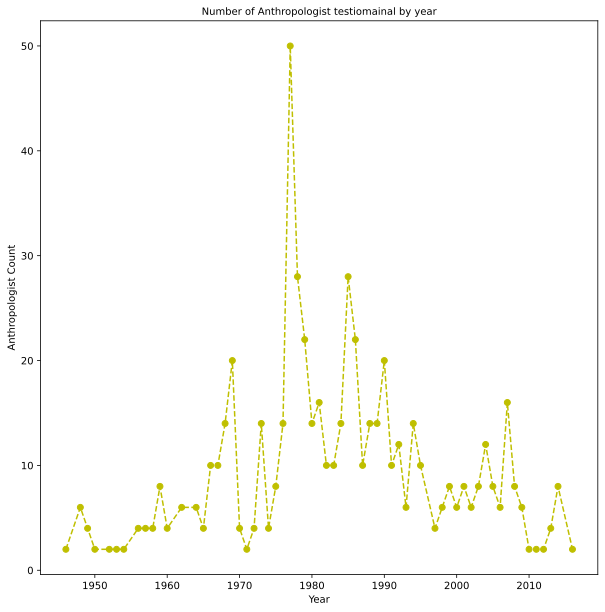

In [35]:
df_anthropologist = df_merged[df_merged["discipline1"] == "Anthropologist"]
anthropologist_by_year = df_anthropologist.groupby('year')['year'].count()
x = list(anthropologist_by_year.keys())
y = list(anthropologist_by_year)

plt.figure(figsize=(10,10))
plt.plot(x,y, linestyle='--', marker='o', color='y', label='')
plt.title("Number of Anthropologist testiomainal by year",fontsize=10)
plt.ylabel('Anthropologist Count',fontsize = 10)
plt.xlabel('Year',fontsize = 10)
plt.show()

#### Analysis
Generally, there doesn't seem to be a lot of antropolgist testifying before Congress, and overall the trend seems to be consist with the exception of the late 1970s.

<BarContainer object of 5 artists>

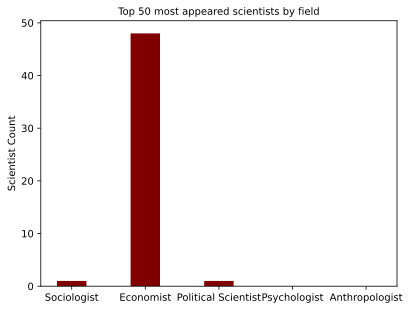

In [36]:
#Visualization 5 - top 50 sceintsis appeared by field 
appearence_by_scientists_top50 = appearence_by_scientists[0:50]

df_merged['discipline1'] = df_merged['discipline1'].astype(str)

top50scientists_field = {'Sociologist':0, 'Economist':0, 'Political Scientist':0,'Psychologist':0, 'Anthropologist':0}

for name in list(appearence_by_scientists_top50.keys()):
    df_name = df_merged[df_merged["witness_name"] == name]
    discipline = df_name.iloc[0]["discipline1"]
    top50scientists_field[discipline] =  top50scientists_field[discipline]+1
    
x = top50scientists_field.keys()
y = top50scientists_field.values()
plt.title("Top 50 most appeared scientists by field",fontsize=10)
plt.ylabel('Scientist Count',fontsize = 10)
plt.bar(x, y, color ='maroon',
        width = 0.4)


### Analysis 
Practically all the scientists who appeared the most seem to be from the field of Economics. This might be because generally Federal Reserve chairman/chairwomen and economic advisors work overlap a lot with Congress

In [37]:
#Visualization 6 - Text Analysis of reason of appearance 
#Getting the description of reason of appearance and tokenzie all all of them
df_merged['title_description'] = df_merged['title_description'].replace(np.nan,"")

title_descriptions = df_merged["title_description"].tolist()
title_descriptions_words = []
for i in range(0,len(title_descriptions)):
  for word in word_tokenize(title_descriptions[i]):
    title_descriptions_words.append(word)

my_stop_words = list(punctuation) + stopwords.words('english')
title_descriptions_words_cleaned = [w for w in title_descriptions_words if w not in my_stop_words]
finder = BigramCollocationFinder.from_words(title_descriptions_words_cleaned)

In [38]:
source = []
target = []
weight = []

for item in finder.ngram_fd.items():
    if(item[1] > 70):
        source.append(item[0][0])
        target.append(item[0][1])
        weight.append(item[1])
 
df_graph = pd.DataFrame({'Source': source,
                   'Target':target,
                   'Weight':weight})

char_dict = {v:k for k,v in dict(pd.Series(list(set(df_graph.Target.unique()).union(set(df_graph.Source.unique())))).astype("category")).items()}
charindex_dict = {v:k for k,v in char_dict.items()}

df_graph['SourceIndex'] = [char_dict[i] for i in df_graph['Source'].values]
df_graph['TargetIndex'] = [char_dict[i] for i in df_graph['Target'].values]

G = nx.from_pandas_edgelist(df_graph, 'SourceIndex', 'TargetIndex', 'Weight')

plot = figure(x_range=Range1d(-20, 20), y_range=Range1d(-20, 20))

network_graph = from_networkx(G, nx.spring_layout, scale=20, center=(0, 0))

network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())

source = ColumnDataSource({'x': x, 'y': y, 'name': [charindex_dict[i] for i in node_labels]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7, x_offset=-2.0, y_offset=-2.0)
plot.renderers.append(labels)

show(plot)

### Analysis 
I used the N-gram method and made a Network analysis to see what words tend to appear a lot next to each. For example words such as small business, Miiddle East, special hearing, free trade, Soviet Union, interest rates, etc appeared a lot which shows what the topics Congress cares about and on what those are the reasons they invited the scientists for testifying.


In [39]:
source = []
target = []
weight = []

apperance_commitie_dic = {}

for i in range(len(df_testimony)):
    value = str(df_testimony.loc[i, "witness_name"])+"-"+ str(df_testimony.loc[i, "full_committee1"])
    if value in apperance_commitie_dic:
        apperance_commitie_dic[value] = apperance_commitie_dic[value] + 1
    else:
        apperance_commitie_dic[value] = 1

for item in apperance_commitie_dic:
    if(apperance_commitie_dic[item] > 10):
        value_list = item.split("-")
        source.append(value_list[0])
        target.append(value_list[1])
        weight.append(apperance_commitie_dic[item])

   



In [40]:
#Network for indivisual who appeared alot and their respective committie
df_graph = pd.DataFrame({'Source': source,
                   'Target':target,
                   'Weight':weight})

char_dict = {v:k for k,v in dict(pd.Series(list(set(df_graph.Target.unique()).union(set(df_graph.Source.unique())))).astype("category")).items()}
charindex_dict = {v:k for k,v in char_dict.items()}

df_graph['SourceIndex'] = [char_dict[i] for i in df_graph['Source'].values]
df_graph['TargetIndex'] = [char_dict[i] for i in df_graph['Target'].values]

G = nx.from_pandas_edgelist(df_graph, 'SourceIndex', 'TargetIndex', 'Weight')

plot = figure(x_range=Range1d(-10, 10), y_range=Range1d(-10, 10))

network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

network_graph.node_renderer.glyph = Circle(size=5, fill_color='skyblue')



plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())

source = ColumnDataSource({'x': x, 'y': y, 'name': [charindex_dict[i] for i in node_labels]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7, x_offset=-2.0, y_offset=-2.0)
plot.renderers.append(labels)

show(plot)

### Analysis
As we can see there are certain scientists who appear a lot before certain financial related commities of Congress which demonstrates the closeness of their work with Congress. This helps to furthur explain the skew toward economists in our dataset.


<Figure size 640x480 with 0 Axes>

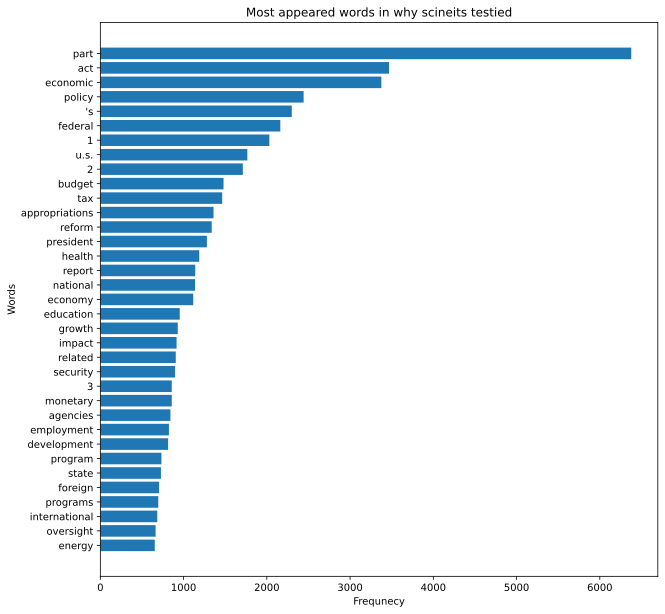

In [41]:
freq_y = []
freq_x = []

for word_pair in FreqDist(title_descriptions_words_cleaned).most_common(35):
    freq_x.append(word_pair[1])
    freq_y.append(word_pair[0])
    
freq_y.reverse()
freq_x.reverse()
fig = plt.figure()
plt.figure(figsize=(10,10))
plt.barh(freq_y, freq_x)
 
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.title("Most appeared words in why scineits testied")

plt.show()

### Analysis 
The most common words were act, economic, budget, tax, appropriations, reform, health, education, growth, security, and employment.

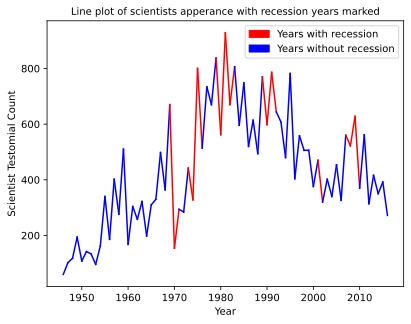

In [42]:
#Trend line with Recession


recession_years = []

for i in range(len(df_recession)):
  if(df_recession.loc[i, "IsRecession"] == 1):
    recession_years.append(df_recession.loc[i, "Year"])

df_merged_by_year = df_merged.groupby('year')['year'].count()
x = list(df_merged_by_year.keys())
y = list(df_merged_by_year)

for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
    if str(int(x1)) in recession_years:
        plt.plot([x1, x2], [y1, y2], 'r')
    else:
        plt.plot([x1, x2], [y1, y2], 'b')
        
plt.title("Line plot of scientists apperance with recession years marked",fontsize=10)
plt.ylabel('Scientist Testomial Count',fontsize = 10)
plt.xlabel('Year',fontsize = 10)
recession_year_legend = mpatches.Patch(color='r', label='Years with recession')
normal_year_legend = mpatches.Patch(color='b', label='Years without recession')
plt.legend(handles=[recession_year_legend,normal_year_legend])
plt.show()

### Analysis 
As we see there is an increase in number of scientists testimonies at the beginning of the recession, but as the situation gets better there is a sharp decline

# Results 

&nbsp;&nbsp;&nbsp;&nbsp; Initially, when looking at the dataset bar chart for social scientists breakdown in the exploratory section it became quite clear, there are significantly more testimonies by economists, There were 10821 testimonies by Economists followed by 2482 testimonies by political scientists, 970 by osychologists, 904 by sociologist and 305 by anthropologists. Also, looking at the Congress breakdown in the same period we observe an increase in the number of Democrate members and then a decline, and opposite for the Republicans. Then the number of testimonials also held a similar pattern to Democrates rise and decline which prompted further investigation to see if there is actually any releationship between politics and scientists testimonies.Thus, we see that overall there has been a decrease in the number of social scientists' testimonies before Congress compared to the 1980s and 1990s as the number of Republican memembers of Conress has increased. When normalizing the number of social scientists' testimonies by what political party the Congress leans towards, we see that 53.9% of testimonies happened at a Democrat-leaning Congress while only 46.1% of them happened at a Republican-leaning Congress which implies social scientists are slightly more likely to testify with a Democratic majority. Although this can not be stated conclusively as there might be many more factors involved of why this disparency exists.<br/>
&nbsp;&nbsp;&nbsp;&nbsp; When analyzing the social scientist's appearance by subfield, surprisingly we observe that the number of testimonies by psychologist has significantly decreased even though there has been a growth in mental health issues and awareness. Mean while the number of testimonies by political scientists has consistently increased which might be due to growing partisanship of our society and respectively our Congress. Testimonies by economists tend to peek around recessions and quickly drop which is expected as Congress wants to decide what to do regarding the state of the economy, what has gone wrong, and what needs to be fixed. But its focuses shifts as the situation gets better. Overall the number of testimonies by anthropologists is consistently low. Interestingly there is a peak in the number of sociologist testimonies in the 1980s but then a drop, this might be due to political turmoil that happened during that era in the middle East such as Iran's revolution & hostage crises, oil embargo by Arab countries and Arab and Israeli war(also similar uptick in 1967 which another Arab Isreali war happened), especially since the word Middle East pops up in the text analysis section as one of the most common reasons cited for appearance.<br/>
&nbsp;&nbsp;&nbsp;&nbsp; Out of the top 50 social scientists who appeared the most over 90% of them happen to be Economist and when checking the witness that appeared the most names such as Alan Greenspan and Alice Rivlin shows up which were fed chairman and Vice Chair of the Federal Reserve respectively. As these people were government officials and due to the nature of work of the federal reserve and Congress it makes sense that the federal reserve employees and economic advisors dominate the top of the list of social scinetists who testified the most.<br/>
&nbsp;&nbsp;&nbsp;&nbsp; Based on the text analysis of word frequencies, N-gram network, and most testimonies by commities, there is a clear pattern that the majority of the times scientists were invited to discuss economic, business-related topics such as economic policy, budget, tax, employment interest rates, small businesses, etc. Additionally, looking at the N-gram network graph and word frequency chart we can that besides economic issues, the soviet union, housing, education, health care, climate change, Middle East, ... are the top items on the list of stuff that Congress invites scientists to discuss with it.<br/>
&nbsp;&nbsp;&nbsp;&nbsp; Based on the line chart of number of testomnies by year with recession marked as red, we can see that when a recession happens there is quick uptick in number of testmonies, but as we go toward the end of the recession there is quick decline. This is explainting by the fact that is Federal Reserve and Congress work together to solve the issue. Thus, it would only make sense that a lot of federal reserve employees and economic advisor testify during this time.

# Discussion 
Unfortunately, contrary that what I expected when I started this project I found out that our government relies less on the guidance of social scientists in its decision-making process. While we saw some weak relationship between political parties and the number of testimonies, it wasn't significant enough to state anything conclusively and further research is required in this area. We saw that the majority of Congress's concerns are economic and political, and there is very little focus on social problems. I believe as our world is getting more complex we should advocate for our government to rely more on the help of experts as it is too hard for us to figure it out indivisually.

## Work Cited
* [Social scientists’ testimony before Congress in the United States between 1946-2016, trends from a new dataset](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0230104)
* [The Great Inflation](https://www.federalreservehistory.org/essays/great-inflation#:~:text=This%2C%20then%2C%20became%20the%20era,unemployment%20was%20over%207.5%20percent.)
* [Arab-Israeli wars](https://www.britannica.com/event/Arab-Israeli-wars)
